#### Imports

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

#### Reading the dataset

In [103]:
dataset = pd.read_csv("Car Evaluation/car.data")

dataset

,buying_price,maintenance_cost,no_of_doors,capacity,luggage_size,safety_level,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


#### Dataset Preprocessing

In [104]:
print(
    'buying_price:', dataset['buying_price'].unique(), '\n',
    '\bmaintenance_cost:', dataset['maintenance_cost'].unique(), '\n',
    '\bno_of_doors:', dataset['no_of_doors'].unique(), '\n',
    '\bcapacity:', dataset['capacity'].unique(), '\n',
    '\bluggage_size:', dataset['luggage_size'].unique(), '\n',
    '\bsafety_level:', dataset['safety_level'].unique(), '\n\n',
    '\bclass:', dataset['class'].unique()
)

buying_price: ['vhigh' 'high' 'med' 'low'] 
maintenance_cost: ['vhigh' 'high' 'med' 'low'] 
no_of_doors: ['2' '3' '4' '5more'] 
capacity: ['2' '4' 'more'] 
luggage_size: ['small' 'med' 'big'] 
safety_level: ['low' 'med' 'high'] 

class: ['unacc' 'acc' 'vgood' 'good']


In [105]:
dataset['buying_price'] = dataset['buying_price'].replace({'low':1, 'med':2, 'high':3, 'vhigh':4})
dataset['maintenance_cost'] = dataset['maintenance_cost'].replace({'low':1, 'med':2, 'high':3, 'vhigh':4})
dataset['no_of_doors'] = dataset['no_of_doors'].replace({'2':1, '3':2, '4':3, '5more':4})
dataset['capacity'] = dataset['capacity'].replace({'2':1, '4':2, 'more':3})
dataset['luggage_size'] = dataset['luggage_size'].replace({'small':1, 'med':2, 'big':3})
dataset['safety_level'] = dataset['safety_level'].replace({'low':1, 'med':2, 'high':3})

dataset['class'] = dataset['class'].replace({'unacc':1, 'acc':2, 'good':3, 'vgood':4})

dataset

,buying_price,maintenance_cost,no_of_doors,capacity,luggage_size,safety_level,class
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,4,3,2,2,3
1724,1,1,4,3,2,3,4
1725,1,1,4,3,3,1,1
1726,1,1,4,3,3,2,3


#### Split data into training and testing sets

In [106]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape)
print(y.shape)

(1728, 6)
(1728,)


#### Fitting the data into a Logistic Regression model

In [107]:
model = LogisticRegression(max_iter=250)

model.fit(X_train, y_train)

LogisticRegression(max_iter=250)

#### Evaluating the model

In [108]:
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.21%


#### Visualizing the model performance using a heatmap

Text(45.722222222222214, 0.5, 'Actual Values')

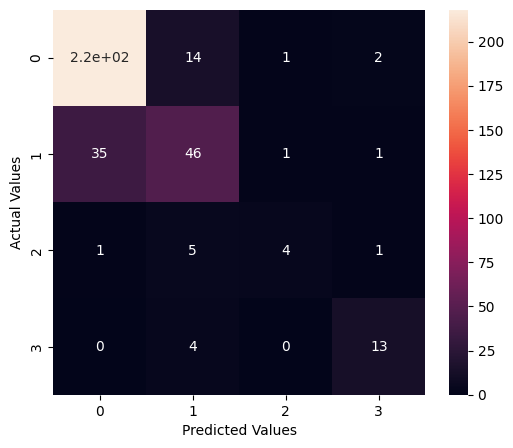

In [114]:
plt.figure(figsize= (6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
